In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print("Current Tensorflow Vision is",tf.__version__)
%matplotlib inline

Current Tensorflow Vision is 2.0.0-beta1


### 1.1 通过Pandas导入数据 

In [2]:
df = pd.read_csv("data/boston.csv", header=0)
print (df.describe())

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [3]:
# 获取df的值

df = df.values
print(df.shape)
print(df)

(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


In [4]:
# 把 df 转换为 np 的数组格式

df = np.array(df)

print(df)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


### 1.2 特征数据归一化

In [5]:
# 对特征数据 【0到11】列 做（0-1）归一化

for i in range(12):
    df[:,i]=(df[:,i]-df[:,i].min())/(df[:,i].max()-df[:,i].min())

### 1.3 载入本示例所需数据

In [6]:
# x_data 为 归一化后的前12列特征数据

x_data = df[:,:12] 

# y_data 为最后1列标签数据

y_data = df[:,12]

In [7]:
print(x_data,'\n shape=', x_data.shape)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 2.08015267e-01
  2.87234043e-01 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.04961832e-01
  5.53191489e-01 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 1.04961832e-01
  5.53191489e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.64122137e-01
  8.93617021e-01 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 1.64122137e-01
  8.93617021e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.64122137e-01
  8.93617021e-01 1.69701987e-01]] 
 shape= (506, 12)


In [8]:
print(y_data,'\n shape=',y_data.shape)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### 1.4 划分数据集

In [9]:
n_train = 300        #训练集的数目
n_valid = 100        #验证集的数目
n_test = len(x_data) - n_train - n_valid    #测试集的数目 = 506 - 训练集的数目 - 验证集的数目

# 训练集划分
trainset = tf.cast(x_data[:n_train], dtype=tf.float32) 
trainlabel = y_data[:n_train]

# 验证集划分
validset = tf.cast(x_data[n_train:n_train+n_valid], dtype=tf.float32)
validlabel = y_data[n_train:n_train+n_valid]

# 测试集划分
testset = tf.cast(x_data[n_train+n_valid:n_train+n_valid+n_test], dtype=tf.float32)
testlabel = y_data[n_train + n_valid : n_train + n_valid + n_test]

## 2、构建模型

### 2.1 构建多元回归模型

初始化$w$和$b$的值，并查看初始的$w$、$b$的shape

In [10]:
W = tf.Variable(tf.random.normal([12, 1],mean=0.0, 
                                 stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros(1) , dtype = tf.float32)
print(W.shape)
print(B.shape)

(12, 1)
(1,)


我们的回归模型仍然是个简单的线性函数，即$y = w*x + b$，但$w$的shape会与之前不同<br>
$w$在此例中是个(3,1)的向量，所以需要用tf.matmul进行矩阵叉乘

In [11]:
def prediction(x, weights, bias):                  #前向传播过程
    return tf.add(tf.matmul(x,weights), bias)   

### 2.2 定义损失函数
我们使用均方差损失函数，其计算的公式为：<br>
$$MSE=\frac {1} {N}\sum_{i=1}^{n}(y-prediction(x))^2$$

In [12]:
# 均方差误差
def loss(x, y, weights, bias):
    error = prediction(x, weights, bias) - y                   
    squared_error = tf.square(error)
    return tf.sqrt(tf.reduce_mean(input_tensor=squared_error)) 

###  2.3 计算梯度

In [13]:
def gradient(x, y, weights, bias):
    with tf.GradientTape() as tape:
        loss_value = loss(x, y, weights, bias)
        return tape.gradient(loss_value, [weights, bias])

## 3、训练模型

### 3.1 设置超参数

In [14]:
learning_rate = 0.001        # 学习率
train_epochs = 40        # 训练轮数

### 3.2 定义训练过程，进行训练
$ w_i = w_i - \alpha\frac {\partial J(w)} {\partial w_i} $<br><br>
$ b_i = b_i - \alpha\frac {\partial J(b)} {\partial b_i} $

In [15]:
loss_list_trainset = [] # 用于保存训练集loss值的列表
loss_list_validset = [] # 用于保存验证集loss值的列表

for epoch in range(train_epochs): 
    for i in range(len(trainlabel)):
        deltaW, deltaB = gradient(trainset[i:i+1,:], trainlabel[i], W, B) 
        change_W = deltaW * learning_rate 
        change_B = deltaB * learning_rate 
        W.assign_sub(change_W) 
        B.assign_sub(change_B)
        
    loss_list_trainset.append(loss(trainset, trainlabel, W, B))
    loss_list_validset.append(loss(validset, validlabel, W, B))
    print("epoch={:d} ,loss={:.3f}".format(epoch+1, loss(validset, validlabel, W, B)))

epoch=1 ,loss=20.123
epoch=2 ,loss=19.420
epoch=3 ,loss=18.725
epoch=4 ,loss=18.040
epoch=5 ,loss=17.365
epoch=6 ,loss=16.702
epoch=7 ,loss=16.052
epoch=8 ,loss=15.418
epoch=9 ,loss=14.800
epoch=10 ,loss=14.202
epoch=11 ,loss=13.625
epoch=12 ,loss=13.073
epoch=13 ,loss=12.562
epoch=14 ,loss=12.099
epoch=15 ,loss=11.681
epoch=16 ,loss=11.313
epoch=17 ,loss=10.993
epoch=18 ,loss=10.722
epoch=19 ,loss=10.490
epoch=20 ,loss=10.293
epoch=21 ,loss=10.126
epoch=22 ,loss=9.989
epoch=23 ,loss=9.879
epoch=24 ,loss=9.793
epoch=25 ,loss=9.733
epoch=26 ,loss=9.692
epoch=27 ,loss=9.668
epoch=28 ,loss=9.657
epoch=29 ,loss=9.655
epoch=30 ,loss=9.661
epoch=31 ,loss=9.675
epoch=32 ,loss=9.695
epoch=33 ,loss=9.720
epoch=34 ,loss=9.747
epoch=35 ,loss=9.779
epoch=36 ,loss=9.810
epoch=37 ,loss=9.844
epoch=38 ,loss=9.876
epoch=39 ,loss=9.911
epoch=40 ,loss=9.947


### 3.3 打印结果 

<IPython.core.display.Javascript object>


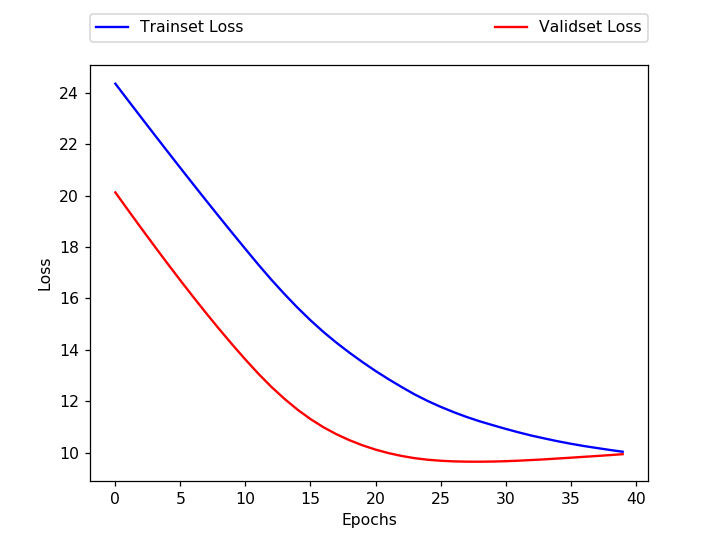

In [16]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_trainset,'blue',label="Trainset Loss")
plt.plot(loss_list_validset,'red',label="Validset Loss")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0,
           ncol=3,mode="expand", borderaxespad=0.)        #图例存放位置的设置

In [17]:
print("Final test loss: {:.3f}".format(loss(testset, testlabel, W, B)))

Final test loss: 11.725


## 4、进行预测

In [18]:
example_house=482
y = y_data[example_house]
x= tf.cast(x_data[example_house].reshape(1,12), dtype=tf.float32)
y_pred =  prediction(x,W,B).numpy()[0,0]
print("Actual  house value",y," in $10K")
print("Predicted  house value ",y_pred," in $10K")

Actual  house value 25.0  in $10K
Predicted  house value  26.819366  in $10K
